<a href="https://colab.research.google.com/github/sheikhmdsamiul/Customer-Retention-Prediction/blob/main/Customer_Retention_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [533]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix


In [ ]:
dataset_path = "/content/dataset.csv"

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)

# **Data Understanding & EDA**

In [ ]:
#shape of the dataset
df.shape

(1000, 15)

In [ ]:
#first few rows of the dataset
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [ ]:
#concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [ ]:
#descriptive statistics of the columns
df.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [ ]:
#missing value check
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Annual_Income,0
Total_Spend,0
Years_as_Customer,0
Num_of_Purchases,0
Average_Transaction_Amount,0
Num_of_Returns,0
Num_of_Support_Contacts,0


In [ ]:
#duplicate row check
df.duplicated().sum()

np.int64(0)

In [ ]:
#droping customer id as its not needed
df = df.drop(['Customer_ID'], axis = 1)
df.head()

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [ ]:
#churn vs not churn values in dataset
df['Target_Churn'].value_counts()

,count
Target_Churn,
True,526
False,474


 Data Visualization

In [ ]:
#setting up visual style
plt.style.use('default')

Text(0.5, 1.0, 'Churn Distribution')

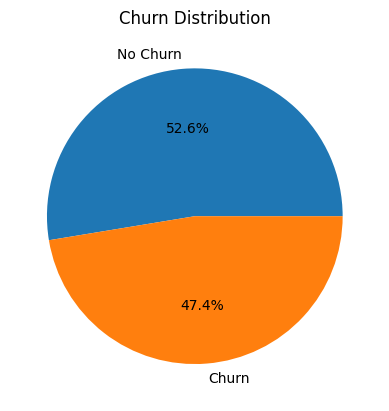

In [ ]:
#Churn Distribution (Pie Chart)
churn_data = df['Target_Churn'].value_counts()
plt.pie(churn_data, labels=['No Churn', 'Churn'], autopct='%1.1f%%')
plt.title('Churn Distribution')

In [ ]:
#handle the categorical columns properly
df_encoded = df.copy()

#Convert categorical columns to numerical codes
df_encoded['Gender'] = df_encoded['Gender'].astype('category').cat.codes
df_encoded['Promotion_Response'] = df_encoded['Promotion_Response'].astype('category').cat.codes

#Convert boolean to int
df_encoded['Email_Opt_In'] = df_encoded['Email_Opt_In'].astype(int)
df_encoded['Target_Churn'] = df_encoded['Target_Churn'].astype(int)

#calculate correlations
correlations = df_encoded.corr()['Target_Churn'].abs().sort_values(ascending=False)
print("Top features correlated with churn:")
correlations.head(15)

Top features correlated with churn:


,Target_Churn
Target_Churn,1.000000
Annual_Income,0.036322
Num_of_Purchases,0.032772
Years_as_Customer,0.029823
Total_Spend,0.028659
Average_Transaction_Amount,0.024723
Satisfaction_Score,0.022567
Gender,0.020786
Last_Purchase_Days_Ago,0.013823
Promotion_Response,0.011255


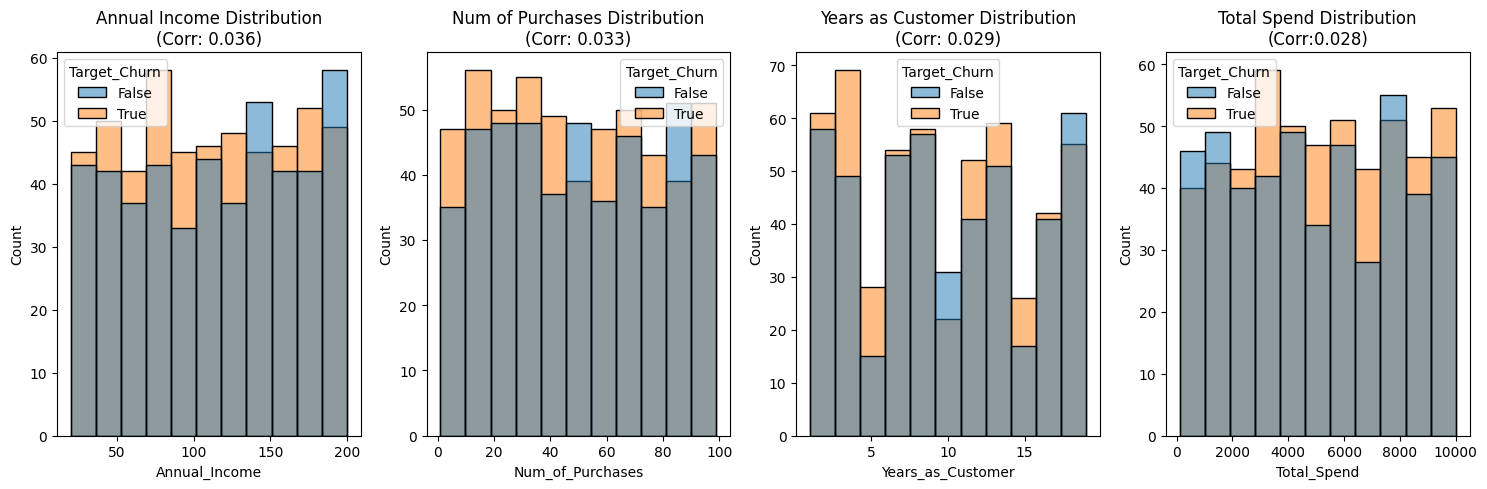

In [ ]:
#Ploting the top 4 correlated features with more detail
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

#Annual Income - highest correlation (0.036)
sns.histplot(data=df, x='Annual_Income', hue='Target_Churn', ax=axes[0])
axes[0].set_title('Annual Income Distribution\n(Corr: 0.036)')

#Num of Purchases
sns.histplot(data=df, x='Num_of_Purchases', hue='Target_Churn', ax=axes[1])
axes[1].set_title('Num of Purchases Distribution\n(Corr: 0.033)')

#Years as Customer
sns.histplot(data=df, x='Years_as_Customer', hue='Target_Churn',  ax=axes[2])
axes[2].set_title('Years as Customer Distribution\n(Corr: 0.029)')

#Total Spend
sns.histplot(data=df, x='Total_Spend', hue='Target_Churn',  ax=axes[3])
axes[3].set_title('Total Spend Distribution\n(Corr:0.028)')

plt.tight_layout()
plt.show()

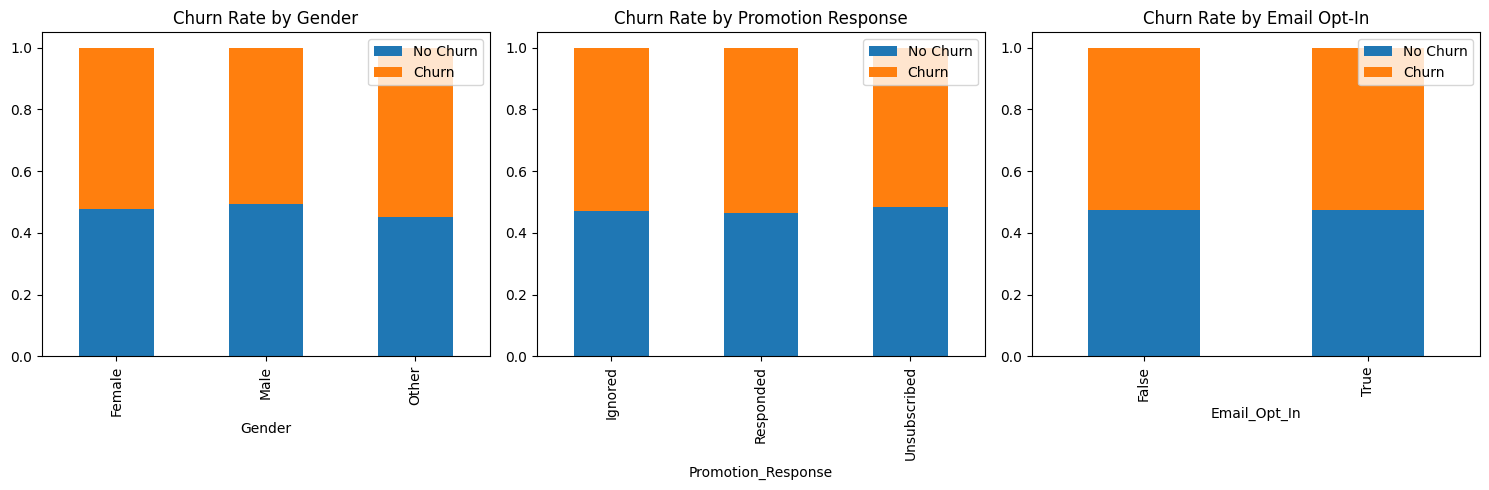

In [ ]:
#Visualize categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Gender
pd.crosstab(df['Gender'], df['Target_Churn'], normalize='index').plot(
    kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Churn Rate by Gender')
axes[0].legend(['No Churn', 'Churn'])

#Promotion Response
pd.crosstab(df['Promotion_Response'], df['Target_Churn'], normalize='index').plot(
    kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Churn Rate by Promotion Response')
axes[1].legend(['No Churn', 'Churn'])

#Email Opt-In
pd.crosstab(df['Email_Opt_In'], df['Target_Churn'], normalize='index').plot(
    kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Churn Rate by Email Opt-In')
axes[2].legend(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

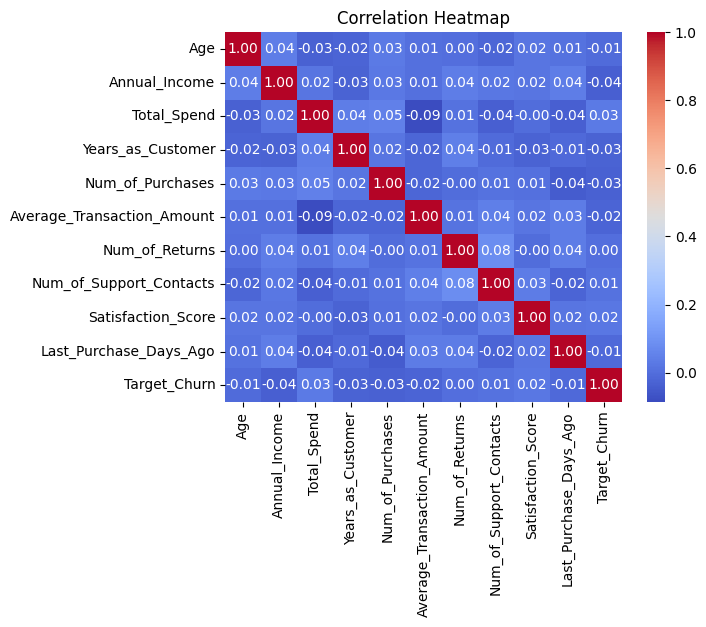

In [ ]:
#Correlation heatmap for numerical features
numeric_features = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
                    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
                    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago',
                    'Target_Churn']
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

As All correlations with churn are very low and through visualization shows a complex churn behavior, not explainable by one or two features. Therefore, using tree based machine learning model that can capture interactions, thresholds, and nonlinear effects.

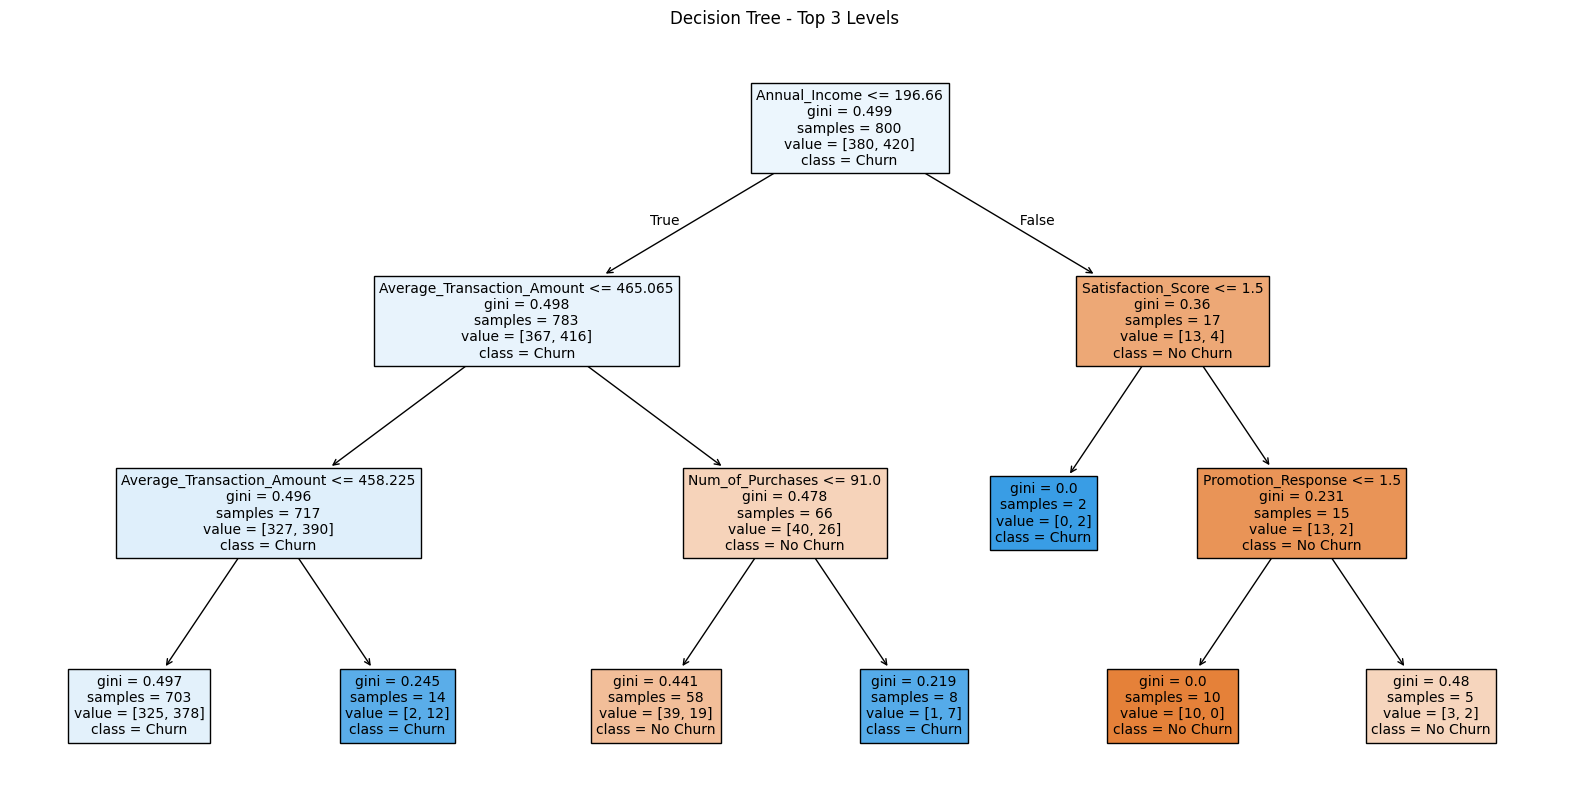

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Target_Churn'])
y = df_encoded['Target_Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Train a shallow decision tree for interpretability
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

#Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_train.columns, class_names=['No Churn', 'Churn'],
          filled=True, fontsize=10)
plt.title('Decision Tree - Top 3 Levels')
plt.show()

The Decision Tree reveals much clearer patterns than the previous analysis.

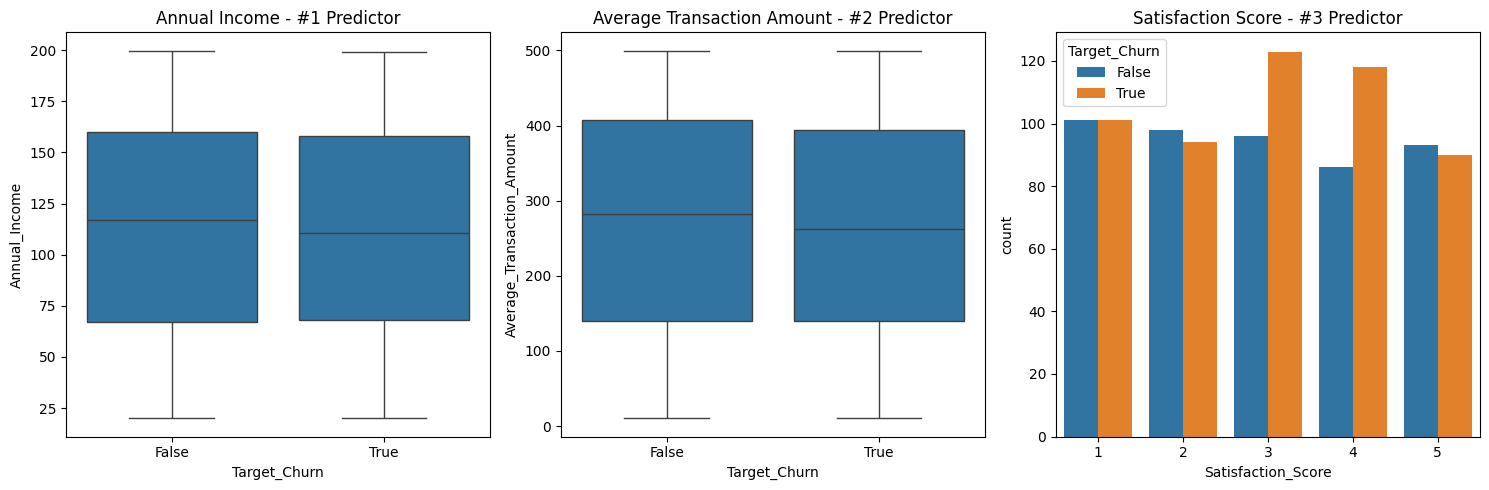

In [ ]:
#The top 3 features from the insights
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Annual_Income - THE most important feature
sns.boxplot(data=df, x='Target_Churn', y='Annual_Income', ax=axes[0])
axes[0].set_title('Annual Income - #1 Predictor')

#Average_Transaction_Amount - #2 predictor
sns.boxplot(data=df, x='Target_Churn', y='Average_Transaction_Amount', ax=axes[1])
axes[1].set_title('Average Transaction Amount - #2 Predictor')

#Satisfaction_Score - #3 predictor
sns.countplot(data=df, x='Satisfaction_Score', hue='Target_Churn', ax=axes[2])
axes[2].set_title('Satisfaction Score - #3 Predictor')

plt.tight_layout()
plt.show()

So we found the features that affects customer turnover than rest of the features using both approches are Annual_Income, Average_Transaction_Amount, Satisfaction_Score, Num_of_Purchases, Years_as_Customer, Total_Spend.

But main thing is looking at the correlation results and the distribution plots, I can see why the correlations are so weak. The distributions show that both churn and non-churn groups have almost identical distributions for most features!


The differences between churned and active customers are statistically insignificant across all features. There's no meaningful signal in this current data. Lets see if it gets improved with feature engineering.

# **Data Preprocessing & Feature Engineering**

In [480]:
#Making a copy of the original dataset
df_processed = df.copy()

In [481]:
#Handle Target Variable
if df_processed['Target_Churn'].dtype == 'bool':
        df_processed['Target_Churn'] = df_processed['Target_Churn'].astype(int)

target_distribution = df_processed['Target_Churn'].value_counts(normalize=True)
target_distribution

,proportion
Target_Churn,
1,0.526
0,0.474


In [482]:
#Separate target
X = df_processed.drop(columns=['Target_Churn'])
y = df_processed['Target_Churn']

In [483]:
#Feature Engineering
X_fe = X.copy()

#Spending Efficiency
X_fe['Spend_to_Income_Ratio'] = X['Total_Spend'] / (X['Annual_Income'] + 1)

#Engagement
X_fe['Purchase_Frequency'] = X['Num_of_Purchases'] / (X['Years_as_Customer'] + 1)

# Loyalty & Value
X_fe['Loyalty_Index'] = (X['Years_as_Customer'] * X['Satisfaction_Score']) / (X['Num_of_Purchases'] + 1)

# Log transforms
for col in ['Annual_Income', 'Total_Spend', 'Average_Transaction_Amount']:
    X_fe[f'log_{col}'] = np.log1p(X[col])

#droping columns
X_fe = X_fe.drop(columns=['Annual_Income', 'Total_Spend', 'Average_Transaction_Amount'])

**Here I took the featues which mattered most for determining churn.**

In [484]:
#80% train, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_fe, y, test_size=0.2, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

In [485]:
#Reset indices
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [486]:
X_train.shape[0]

800

In [487]:
X_test.shape[0]

100

In [488]:
X_val.shape[0]

100

In [489]:
#Creating preprocessor
def CreatePreprocessor(X):
    # Identify categorical and numeric columns
    cat_cols = ['Gender', 'Promotion_Response', 'Email_Opt_In']
    num_cols = [c for c in X.columns if c not in cat_cols + ['Target_Churn'] if c in X.columns]

    # Encoder Scaler Processor
    processor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
        ],
        remainder='drop'
    )
    return processor

In [490]:
#Creating Pipeline without feature eng
def CreatePipeline(model, X):
  pipeline = Pipeline(steps=[
      ('preprocessing', CreatePreprocessor(X)),
      ('classifier', model)
  ])

  return pipeline

In [491]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# **Base Models**

In [492]:
#Logistic Regression
model = LogisticRegression(class_weight='balanced')
lr = CreatePipeline(model, X_train)
auc_scores = cross_val_score(lr, X_train, y_train, cv=cv, scoring='roc_auc')

print("Cross-Validation AUC Scores:", auc_scores)
print("Mean AUC:", auc_scores.mean())
print("Std Dev:", auc_scores.std())

Cross-Validation AUC Scores: [0.50807843 0.51112155 0.46365915 0.44110276 0.46162281]
Mean AUC: 0.4771169394073419
Std Dev: 0.027688009766979587


In [493]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state=42)
lr = CreatePipeline(model, X_train)
auc_scores = cross_val_score(lr, X_train, y_train, cv=cv, scoring='roc_auc')

print("Cross-Validation AUC Scores:", auc_scores)
print("Mean AUC:", auc_scores.mean())
print("Std Dev:", auc_scores.std())

Cross-Validation AUC Scores: [0.52329412 0.53258145 0.49796366 0.49185464 0.51707393]
Mean AUC: 0.512553560371517
Std Dev: 0.015350703748054462


In [494]:
import lightgbm as lgb

model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lr = CreatePipeline(model, X_train)
auc_scores = cross_val_score(lr, X_train, y_train, cv=cv, scoring='roc_auc')

print("Cross-Validation AUC Scores:", auc_scores)
print("Mean AUC:", auc_scores.mean())
print("Std Dev:", auc_scores.std())

[LightGBM] [Info] Number of positive: 336, number of negative: 304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1686
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 337, number of negative: 303
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1691
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 337, number of negative: 303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1691
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training Base models

In [495]:
#Train Random Forest
model = LogisticRegression(class_weight='balanced')
lr = CreatePipeline(model, X_train)
lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Years_as_Customer',
                                                   'Num_of_Purchases',
                                                   'Num_of_Returns',
                                                   'Num_of_Support_Contacts',
                                                   'Satisfaction_Score',
                                                   'Last_Purchase_Days_Ago',
                                                   'Spend_to_Income_Ratio',
                                                   'Purchase_Frequency',
                                                   'Loyalty_Index',
                                                   'log_Annual_Income',
                                                   'log_Total_Spend',
                                                   'log_Average_Transaction_Amount']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Promotion_Response',
                                                   'Email_Opt_In'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [496]:
#Train the XGBoost model using the pipeline
xgb_classifier_pipeline = CreatePipeline(xgb.XGBClassifier(random_state=42), X_fe)
xgb_classifier_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Years_as_Customer',
                                                   'Num_of_Purchases',
                                                   'Num_of_Returns',
                                                   'Num_of_Support_Contacts',
                                                   'Satisfaction_Score',
                                                   'Last_Purchase_Days_Ago',
                                                   'Spend_to_Income_Ratio',
                                                   'Purchase_Frequency',
                                                   'Loyalty_Index',
                                                   'log_Annual_Income',
                                                   'log_Total_Spend',
                                                   'log_Average_Transaction_Am...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [497]:
#Train the LightGBM model using the pipeline
lgb_classifier_pipeline = CreatePipeline(lgb.LGBMClassifier(class_weight='balanced', random_state=42), X_train)
lgb_classifier_pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 421, number of negative: 379
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1983
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Years_as_Customer',
                                                   'Num_of_Purchases',
                                                   'Num_of_Returns',
                                                   'Num_of_Support_Contacts',
                                                   'Satisfaction_Score',
                                                   'Last_Purchase_Days_Ago',
                                                   'Spend_to_Income_Ratio',
                                                   'Purchase_Frequency',
                                                   'Loyalty_Index',
                                                   'log_Annual_Income',
                                                   'log_Total_Spend',
                                                   'log_Average_Transaction_Amount']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Promotion_Response',
                                                   'Email_Opt_In'])])),
                ('classifier',
                 LGBMClassifier(class_weight='balanced', random_state=42))])

In [498]:
def print_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print()

    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

    class_report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(class_report)

In [504]:
#Testing Random Forst
y_pred = lr.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.42
Precision: 0.44
Recall: 0.40

Confusion Matrix:
[[21 27]
 [31 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.44      0.42        48
           1       0.44      0.40      0.42        52

    accuracy                           0.42       100
   macro avg       0.42      0.42      0.42       100
weighted avg       0.42      0.42      0.42       100



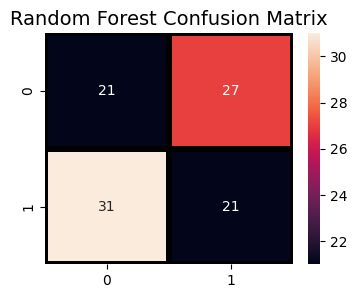

In [505]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Random Forest Confusion Matrix",fontsize=14)
plt.show()

In [500]:
# Testing xgboost

y_pred = xgb_classifier_pipeline.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.54
Precision: 0.56
Recall: 0.58

Confusion Matrix:
[[24 24]
 [22 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        48
           1       0.56      0.58      0.57        52

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



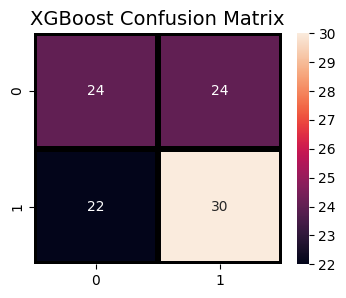

In [501]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("XGBoost Confusion Matrix",fontsize=14)
plt.show()

In [502]:
#Testing LightGbm
y_pred = lgb_classifier_pipeline.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.49
Precision: 0.51
Recall: 0.52

Confusion Matrix:
[[22 26]
 [25 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.46      0.46        48
           1       0.51      0.52      0.51        52

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


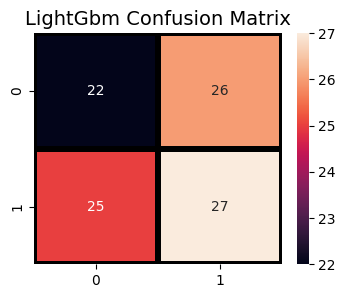

In [503]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LightGbm Confusion Matrix",fontsize=14)
plt.show()

In [ ]:
!pip install scikeras

# **Advanced Model (ANN)**

In [518]:
#Calculating class weight as there was a slight imbalance
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [519]:
#Fit the preprocessor on the training data
preprocessor = CreatePreprocessor(X_train).fit(X_train)
preprocessor1 = CreatePreprocessor(X_val).fit(X_val)

#Transform the training and validation data
X_train_scaled = preprocessor.transform(X_train)
X_val_scaled = preprocessor1.transform(X_val)


#Define the ANN model
ann_model = models.Sequential([
layers.Input(shape=(X_train_scaled.shape[1],)),
layers.Dense(128, activation='relu'),
layers.BatchNormalization(),
layers.Dropout(0.3),
layers.Dense(64, activation='relu'),
layers.BatchNormalization(),
layers.Dropout(0.3),
layers.Dense(32, activation='relu'),
layers.Dropout(0.2),
layers.Dense(1, activation='sigmoid')
])


ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

In [520]:
#Adding Early Stiping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', patience=5, mode='max', restore_best_weights=True
)

#Adding learning rate reduction
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_auc',
    factor=0.5,
    patience=3,
    mode='max',
    min_lr=1e-6
)

history = ann_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=5000,
    batch_size=8,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/5000
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5288 - auc: 0.5154 - loss: 0.8717 - val_accuracy: 0.4800 - val_auc: 0.4835 - val_loss: 0.6997 - learning_rate: 0.0010
Epoch 2/5000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5188 - auc: 0.5300 - loss: 0.8027 - val_accuracy: 0.5300 - val_auc: 0.5175 - val_loss: 0.7046 - learning_rate: 0.0010
Epoch 3/5000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5215 - auc: 0.5079 - loss: 0.8002 - val_accuracy: 0.5100 - val_auc: 0.5187 - val_loss: 0.7120 - learning_rate: 0.0010
Epoch 4/5000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5533 - auc: 0.5734 - loss: 0.7330 - val_accuracy: 0.5000 - val_auc: 0.4691 - val_loss: 0.7374 - learning_rate: 0.0010
Epoch 5/5000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5316 - auc: 0.5311 - loss: 0.7691 - val_accuracy: 0.5200 - val_auc: 0.4743 - val_loss: 0.7369 - learning_rate: 0.0010
Epoch 6/5000
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.55

In [521]:
#Transform test data
X_test_scaled = preprocessor.transform(X_test)

#Evaluate on test set
test_loss, test_acc, test_auc = ann_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"TEST SET RESULTS:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

TEST SET RESULTS:
Test Loss: 0.6980
Test Accuracy: 0.4900
Test AUC: 0.5136


In [522]:
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    No Churn       0.44      0.58      0.50        48
       Churn       0.46      0.33      0.38        52

    accuracy                           0.45       100
   macro avg       0.45      0.46      0.44       100
weighted avg       0.45      0.45      0.44       100



In [523]:
#Get predictions
y_pred_proba = ann_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

ROC-AUC Score: 0.5144


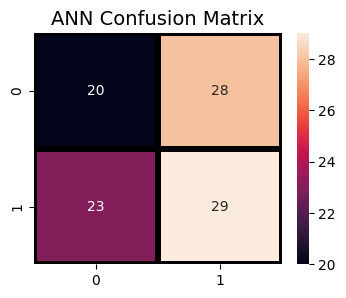

In [524]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("ANN Confusion Matrix",fontsize=14)
plt.show()

**Despite using different architectures (including a feedforward neural net), all models converged around AUC ≈ 0.5. This indicates the issue lies in the data, not in the modeling.**

# **Evaluation Report**

In [530]:
#Create comprehensive evaluation metrics
def evaluate_model(model, model_name, X_test, y_test, is_ann=False):
    if is_ann:
        #Use the scaled test data for the ANN model
        y_pred = (model.predict(X_test_scaled) > 0.5).astype(int).flatten()
        y_pred_proba = model.predict(X_test_scaled).flatten()
    else:
        #The pipeline handles preprocessing for other models
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0),
        'AUC': roc_auc_score(y_test, y_pred_proba),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }



#Evaluate all models
model_results = []

models_to_evaluate = [
    (lr, 'Logistic Regression', False),
    (xgb_classifier_pipeline, 'XGBoost', False),
    (lgb_classifier_pipeline, 'LightGBM', False),
    (ann_model, 'ANN', True)
]

for model, name, is_ann in models_to_evaluate:
    results = evaluate_model(model, name, X_test, y_test, is_ann)
    model_results.append(results)

#Create metrics DataFrame
metrics_df = pd.DataFrame(model_results)
metrics_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


,Model,Accuracy,Precision,Recall,F1-Score,AUC,y_pred,y_pred_proba
0,Logistic Regression,0.42,0.437500,0.403846,0.420000,0.457532,"[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[0.4710812283661052, 0.5240477847173574, 0.419..."
1,XGBoost,0.54,0.555556,0.576923,0.566038,0.466747,"[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, ...","[0.037759732, 0.24145068, 0.15497723, 0.501730..."
2,LightGBM,0.49,0.509434,0.519231,0.514286,0.478766,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, ...","[0.1232598343302509, 0.1349014457624267, 0.471..."
3,ANN,0.49,0.508772,0.557692,0.532110,0.514423,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.39443496, 0.447708, 0.46016437, 0.5507949, ..."


In [531]:
metrics_df = metrics_df.drop(['y_pred', 'y_pred_proba'], axis=1)

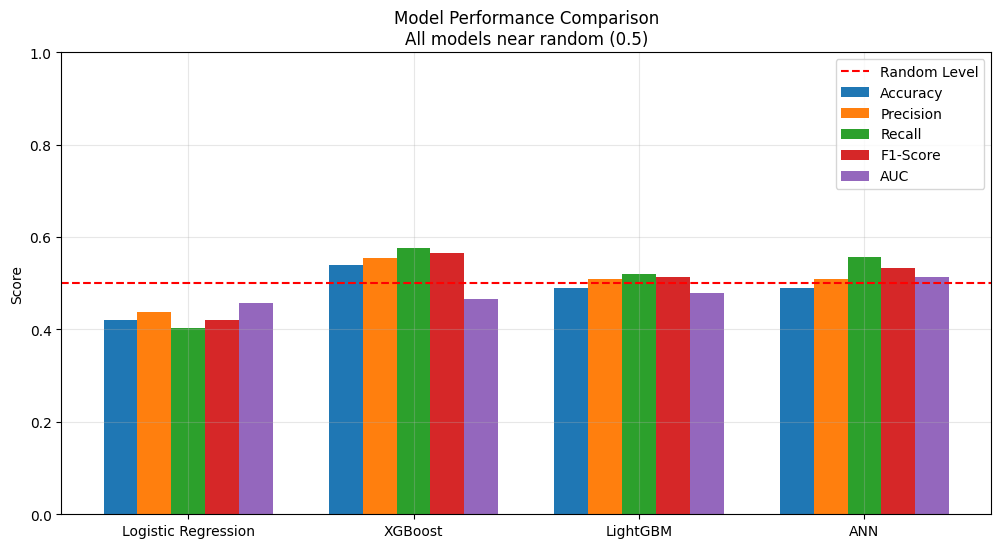

In [532]:
#Simple Bar Chart
plt.figure(figsize=(12, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics_df))

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*0.15, metrics_df[metric], width=0.15, label=metric)

plt.axhline(y=0.5, color='red', linestyle='--', label='Random Level')
plt.xticks(x + 0.3, metrics_df['Model'])
plt.ylabel('Score')
plt.title('Model Performance Comparison\nAll models near random (0.5)')
plt.legend()
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


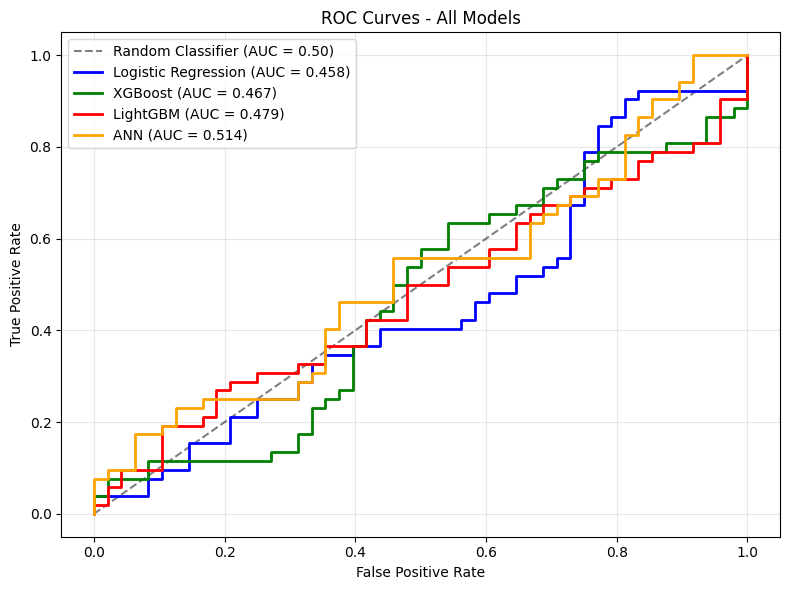

In [537]:
#ROC Curves
plt.figure(figsize=(8, 6))

#Random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)', alpha=0.5)

#Plot ROC curves for each model
models_roc = [
    (lr, 'Logistic Regression'),
    (xgb_classifier_pipeline, 'XGBoost'),
    (lgb_classifier_pipeline, 'LightGBM')
]

colors = ['blue', 'green', 'red', 'orange']
for i, (model, name) in enumerate(models_roc):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', color=colors[i], linewidth=2)

#For ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_model.predict(X_test_scaled).flatten())
auc_ann = roc_auc_score(y_test, ann_model.predict(X_test_scaled).flatten())
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {auc_ann:.3f})', color=colors[3], linewidth=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**### Model Performance Analysis**

Based on the overall evaluation:




In [536]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.42,0.437500,0.403846,0.420000,0.457532
1,XGBoost,0.54,0.555556,0.576923,0.566038,0.466747
2,LightGBM,0.49,0.509434,0.519231,0.514286,0.478766
3,ANN,0.49,0.508772,0.557692,0.532110,0.514423


As shown in the table and the visualizations, all models are performing poorly, with Accuracy and AUC scores close to 0.5. This indicates that none of the models are significantly better than random guessing at predicting churn on this dataset.

This reinforces the earlier observation during EDA that the features in this dataset do not have a strong relationship with the target variable (Target_Churn). Even with feature engineering and different model architectures, the models are unable to find a meaningful signal to distinguish between churned and non-churned customers.

**Conclusion:**

The current dataset does not contain sufficient predictive power to build an effective churn prediction model. The lack of meaningful correlations and visuals in EDA and the poor performance across various models suggest that the features are not capturing the underlying factors that drive customer churn in this context. Further investigation into the data collection process or the inclusion of new, more relevant features would be necessary to improve model performance.